# Data  생성하기

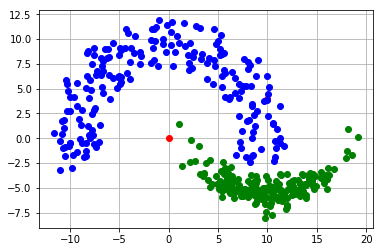

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

### standard point
x = [0, 10]
y = [0, 4]

plt.plot(x,y,'ro')

### uniform rand
uni_angle = np.random.uniform(low=-0.1, high=1.1, size = 200) * (math.pi)
uni_r = np.random.uniform(low = 7, high = 12, size = 200)
uni_x = []
uni_y = []

for i in range(0,200):
    uni_x.append(uni_r[i] * math.cos(uni_angle[i]))
    uni_y.append(uni_r[i] * math.sin(uni_angle[i]))

plt.plot(uni_x, uni_y, 'bo')

### Gausian rand
gaus_angle = np.random.normal(loc = 0.5, scale = 0.15, size = 200)* math.pi + math.pi
gaus_r = np.random.normal(loc = 9.5, scale = 0.7, size = 200)
gaus_x = []
gaus_y = []

for i in range(0,200):
    gaus_x.append(10+gaus_r[i] * math.cos(gaus_angle[i]))
    gaus_y.append(4+gaus_r[i] * math.sin(gaus_angle[i]))

plt.plot(gaus_x,gaus_y,'go')
plt.grid()
plt.show()

data_o = np.empty((400,2))
result = np.empty(400)

for i in range(0,200):
    data_o[i][0] = uni_x[i]
    data_o[i][1] = uni_y[i]
    data_o[i+200][0] = gaus_x[i]
    data_o[i+200][1] = gaus_y[i]
    result[i] = 1
    result[i+200] = -1

mean = data_o.mean()
data = data_o-mean
maax = np.abs(data).max()
data = data / maax
data = np.round(data,3)
# print data
print result
print len(data), len(result)


# Training

0.005
0.0025
0.00125
0.000625
0.0003125
acc 0.94
loss 36.71497374423907


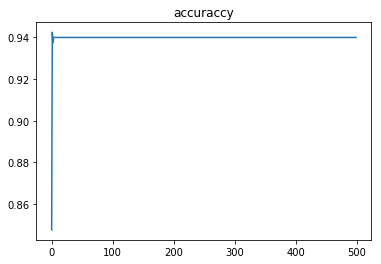

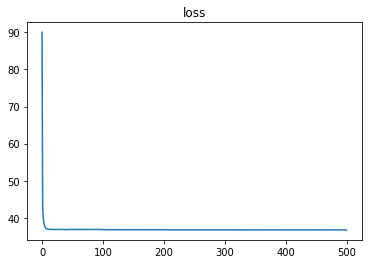

In [38]:
### weights initiation
import matplotlib.pyplot as plt

# weights = np.random.normal(0,1,len(data[0]))
# bias = np.random.normal(0,1,1)
W0 = np.array([[0.5],[0.5]])
b0 = np.array([0.5])
epoch = 500
acc = []
loss = []
alpha = 5
lr = 0.01

for e in range(0,epoch):

    ### forward propagendation
    if e % 100 == 0 :
        lr *= 0.5
        print lr

    acc_count = 0
    loss_count = 0
    
    arr = np.arange(len(data))
    np.random.shuffle(arr)
    
    for n in arr:
        
        f0 = data[n].dot(W0) + b0
        output = np.tanh(f0)
    
        ## accuracy & loss cal
        error = result[n]-output[0]
        
        if abs(error) < 1 : acc_count += 1
        loss_count += 0.5*(error)**2
        
        ## Backpropagation
        dz0 = alpha*error*(1-output[0]**2)
        dW0 = dz0*np.array([data[n]]).T
        
        W0 = W0 + lr*dW0

    loss.append(loss_count)
    acc.append(float(acc_count)/float(len(data)))
    
print "acc", acc[-1]
print "loss", loss[-1]
    
plt.figure(1)
plt.plot(acc)
plt.title('accuraccy')

plt.figure(2)
plt.plot(loss)
plt.title('loss')

plt.show()



# print output
# print acc
# print loss


In [18]:
print np.array([data[n]]).T

[[-0.405]
 [ 0.259]]


(1097, 1643)


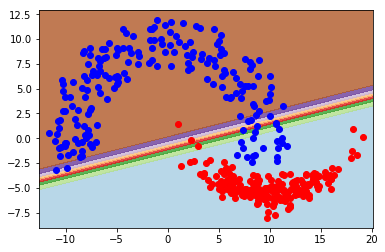

In [39]:
h = .02  # step size in the mesh
x_min, x_max = data_o[:, 0].min() - 1, data_o[:, 0].max() + 1
y_min, y_max = data_o[:, 1].min() - 1, data_o[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

data_n = np.c_[xx.ravel(),yy.ravel()]
data_n -= mean
data_n /= maax


## input layer
output = data_n.dot(W0) + b0
z = np.tanh(alpha*output)



z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
# plt.contourf(xx, yy, z, cmap='jet', alpha=0.8)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

print xx.shape

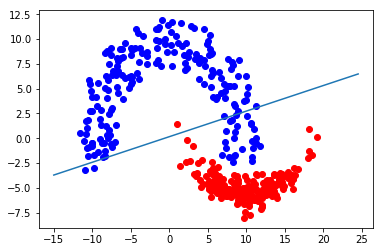

In [40]:
import matplotlib.pyplot as plt

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

bound_x = np.arange(-15,25,0.5)
bound_y = []

for i in bound_x:
    bound_y.append((-(W0[0]*i)+b0)/W0[1])
    
plt.plot(bound_x,bound_y)